In [2]:
import os
import json
import requests
from datetime import datetime, timedelta


class WeatherAPI:
    """
    This class is used to get weather data from BMKG.
    """
    def __init__(self, local_path):
        """
        Initialize the class.
        """
        self.local_path = local_path
        self.provinces = ["DKIJakarta", "DIYogyakarta", "JawaBarat", "Bali", "KalimantanSelatan"]
        self.wilayah_url = "https://ibnux.github.io/BMKG-importer/cuaca/wilayah.json"
        self.wilayah_id_map = {}
        """
        Get the wilayah data from BMKG.
        """

    def get_wilayah_data(self):
        with requests.Session() as session:
            response = session.get(self.wilayah_url)
        wilayah_data = response.json()
        self.wilayah_id_map = {(wilayah["propinsi"], wilayah["kota"]): wilayah["id"] for wilayah in wilayah_data if wilayah["propinsi"] in self.provinces}
        return self.wilayah_id_map
        """
        Get the weather data from BMKG.
        """

    # This is a function that gets the weather data from the BMKG website
    def get_weather_data(self, wilayah_id):
            url = f"https://ibnux.github.io/BMKG-importer/cuaca/{wilayah_id}.json"
            with requests.Session() as session:
                response = session.get(url)
            return response.json()
    # This is a function that gets the wilayah id from the BMKG website

    # This is a function that gets the dates from the BMKG website
    def get_wilayah_id(self, provinsi, kota):
        key = (provinsi, kota)
        return self.wilayah_id_map.get(key)

    # This is a function that returns a list of dates between two dates
    def get_dates(self, start_date, end_date):
            # This is a generator that returns a list of dates between two dates
            return (start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1))

    # This is a function that returns the path of a file

        # This is a function that returns the path of a file
    def get_local_path(self, provinsi, kota, date):

    # This is a function that saves weather data to a file
        return os.path.join(self.local_path, provinsi, kota, f"{date.strftime('%Y%m%d')}.json")
        # This is a function that returns the id of a city

        # This is a conditional statement that checks if the id of a city is None
    def save_weather_data(self, provinsi, kota, date):
            # This is a return statement that returns None
        wilayah_id = self.get_wilayah_id(provinsi, kota)
        if wilayah_id is None:
        # This is a variable that stores the weather data of a city
            return
        # This is a variable that stores the path of a file

        # This is a function that creates a directory
        weather_data = self.get_weather_data(wilayah_id)
        # This is a context manager that opens a file

            # This is a function that writes a JSON object to a file
        local_path = self.get_local_path(provinsi, kota, date)
        os.makedirs(os.path.dirname(local_path), exist_ok=True)
        with open(local_path, "w") as f:
            json.dump(weather_data, f)


# This is a function that loads weather data from a file
    def load_weather_data(self, provinsi, kota, start_date, end_date):
        # This is a variable that stores a list of dates
        dates = self.get_dates(start_date, end_date)
        # This is a variable that stores a dictionary of weather data
        self.weather_data = {}
        # This is a for loop that iterates through a list of dates
        for date in dates:
            # This is a variable that stores the path of a file
            local_path = self.get_local_path(provinsi, kota, date)
            # This is a conditional statement that checks if a file exists
            if os.path.exists(local_path):
                # This is a context manager that opens a file
                with open(local_path, "r") as f:
                    # This is a dictionary that stores weather data
                    self.weather_data[date] = json.load(f)
            else:
                # This is a function that saves weather data to a file
                self.save_weather_data(provinsi, kota, date)

    #this function to update data
    def update_weather_data(self, provinsi, kota):
        end_date = datetime.now().date()
        start_date = end_date - timedelta(days=1)
        self.load_weather_data(provinsi, kota, start_date, end_date)

    def update_all_weather_data(self):
        self.get_wilayah_data()
        wilayah_data = requests.get(self.wilayah_url).json()
        for provinsi in self.provinces:
            for wilayah in (w for w in wilayah_data if w["propinsi"] == provinsi):
                self.update_weather_data(provinsi, wilayah["kota"])


In [3]:
cwd = os.getcwd()
cwd

'c:\\Users\\bayuz\\Documents\\Data Engineering DBB\\Task Day 2'

In [4]:
# #get current path
# test = WeatherAPI(cwd)

# from datetime import datetime

# date = datetime.now()
# print(date)  # Output: 20230328

# #get all data in province target
# wilayah_id = test.get_wilayah_data()

# #looping for get id 
# for x,y in wilayah_id.items():

#     #get wheater for every city
#     cuaca = test.get_weather_data(y)
    
#     #save
#     test.save_weather_data(x[0],x[1],date)

In [5]:
# Update Values
cwd = os.getcwd()
test = WeatherAPI(cwd)
from datetime import datetime

date = datetime.now()
# print(date)  # Output: 20230330

wilayah_id = test.get_wilayah_data()

for x,y in wilayah_id.items():

    update_weather = test.update_all_weather_data()
    print("sukses")
    

sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses


Setelah dilakukan update : <br>
Cross check API <br>
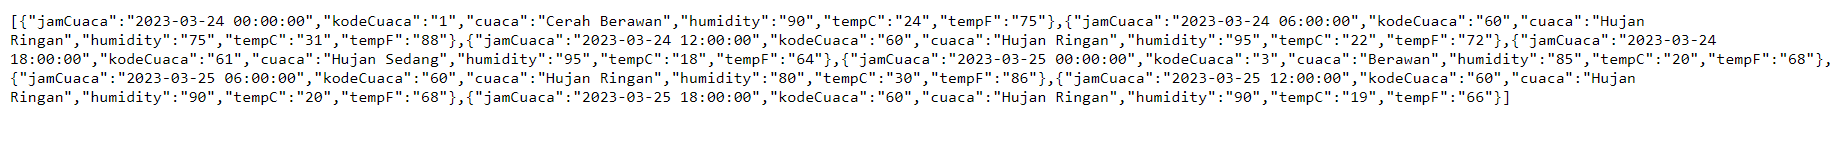 <br>


result <br>
[{"jamCuaca": "2023-03-24 00:00:00", "kodeCuaca": "1", "cuaca": "Cerah Berawan", "humidity": "90", "tempC": "24", "tempF": "75"}, {"jamCuaca": "2023-03-24 06:00:00", "kodeCuaca": "60", "cuaca": "Hujan Ringan", "humidity": "75", "tempC": "31", "tempF": "88"}, {"jamCuaca": "2023-03-24 12:00:00", "kodeCuaca": "60", "cuaca": "Hujan Ringan", "humidity": "95", "tempC": "22", "tempF": "72"}, {"jamCuaca": "2023-03-24 18:00:00", "kodeCuaca": "61", "cuaca": "Hujan Sedang", "humidity": "95", "tempC": "18", "tempF": "64"}, {"jamCuaca": "2023-03-25 00:00:00", "kodeCuaca": "3", "cuaca": "Berawan", "humidity": "85", "tempC": "20", "tempF": "68"}, {"jamCuaca": "2023-03-25 06:00:00", "kodeCuaca": "60", "cuaca": "Hujan Ringan", "humidity": "80", "tempC": "30", "tempF": "86"}, {"jamCuaca": "2023-03-25 12:00:00", "kodeCuaca": "60", "cuaca": "Hujan Ringan", "humidity": "90", "tempC": "20", "tempF": "68"}, {"jamCuaca": "2023-03-25 18:00:00", "kodeCuaca": "60", "cuaca": "Hujan Ringan", "humidity": "90", "tempC": "19", "tempF": "66"}] <br>


tidak terdapat update saat data di tarik pada tanggal 2023-03-30